# Exploratory Data Analysis for the Dengue Serotype Classifier

The aim of this notebook is to identify Dengue serotypes from genomic sequence fragments 

This notebook is organized in the following sections:

* Data preprocessing
* Preprocessing labeled data
* Exploratory Data Analysis (ToDo)

In [17]:
import pandas as pd
import re

## Preprocessing

In order to put clean data into the classifier, we start by getting sequences and descriptions for each sequence

__Load the data__

In [2]:
datafile = open('../data/all_den_proteinE.fasta', 'r')

In [14]:
data = ''

with open('../data/all_den_proteinE.fasta', 'r') as file:
    data = file.read()

In [23]:
print(data[:10000])

>KR919614.1 Dengue virus 1 isolate GZ2014014 envelope gene, partial cds
ATAGGCAACAGAGACTTCGTTGAAGGACTGTCAGGAGCAACATGGGTGGATGTGGTACTGGAGCATGGAA
GCTGTGTCACCACCATGGCAAAGAATAAACCAACATTGGACATTGAACTCTTGAAGACGGAGGTCACGAA
CCCTGCCGTCTTGCGCAAACTGTGCATTGAAGCTAAAATATCAAACACCACCACCGATTCAAGATGTCCA
ACACAAGGAGAAGCTACACTGGTGGAAGAACAAGACGCGAACTTTGTGTGTCGACGAACATTCGTGGACA
GAGGCTGGGGTAATGGTTGTGGACTATTCGGGAAGGGAAGCTTACTAACGTGTGCTAAGTTTAAGTGTGT
GACAAAACTTGAAGGAAAGATAGTTCAATATGAAAACTTAAAATATTCGGTGATAGTCACTGTCCACACT
GGGGACCAGCACCAGGTAGGAAATGAGACTACAGAACATGGAACAATTGCAACCATAACACCTCAAGCTC
CCACGTCGGAAATACAGCTGACTGACTACGGAGCCCTTACATTGGACTGCTCACCTAGAACAGGGCTGGA
CTTTAATGAGATGGTGCTGTTGACAATGAAAGAAAAATCATGGCTTGTCCACAAACAATGGTTTCTAGAC
TTACCATTACCTTGGACCTCGGGGGCTTCAACATCTCAAGAGACTTGGAACAGACAAGATCTGCTGGTCA
CGTTTAAGACAGCTCATGCAAAGAAGCAGGAAGTAGTCGTACTGGGGTCACAAGAAGGAGCAATGCACAC
TGCGTTGACTGGGGCGACAGAAATCCAGACGTCAGGAACGACGACAATCCTCGCAGGACACCTGAAATGT
AGACTGAAAATGGATAAACTGACTTTAAAAGGGGTGTCATATGTGATGTGCACAGGCTCATTTAAGCTAG
AGAAG

As we can see, the data has a sequence description, and the sequence itself.

Now, lets extract both, descriptions and sequences, by using regular expressions.

__Extract descriptions and sequences__

In [156]:
# Extract descriptions
regex_heads = r'\>.+\n'
data_heads = re.findall(regex_heads, data)

data_heads = [d[:-1] for d in data_heads]

In [157]:
# Extract sequences
data_sequences = re.sub(regex_heads, '', data)

data_sequences = re.sub(r'\n\n', '\t', data_sequences)
data_sequences = re.sub(r'\n', '', data_sequences)
data_sequences = re.sub(r'\t', '\n', data_sequences)

regex_sequences = r'[ACTG]+\n'
data_sequences = re.findall(regex_sequences, data_sequences)
data_sequences = [d[:-1] for d in data_sequences]

We must be sure that descriptions and sequences has the same length.

In [160]:
len(data_sequences)

10125

In [161]:
len(data_heads)

10125

Now we are ready to load the data into a Pandas.DataFrame

__Load data into DataFrame__

In [163]:
df = pd.DataFrame({'description': data_heads,
             'sequence': data_sequences})

In [164]:
df.head()

,description,sequence
0,>KR919614.1 Dengue virus 1 isolate GZ2014014 e...,ATAGGCAACAGAGACTTCGTTGAAGGACTGTCAGGAGCAACATGGG...
1,>KR919613.1 Dengue virus 1 isolate GZ2014013 e...,ATAGGCAACAGAGACTTCGTGGAAGGACTGTCAGGAGCAACTTGGG...
2,>JN544408.1 Dengue virus 1 isolate SG(EHI)D1/2...,ATGCGGTGCGTGGGAATAGGCAACAGAGACTTCGTTGAAGGACTGT...
3,>JN544406.1 Dengue virus 1 isolate SG(EHI)D1/1...,ATGCGGTGCGTGGGAATAGGCAACAGAGACTTCGTTGAAGGACTGT...
4,>JN544405.1 Dengue virus 1 isolate SG(EHI)D1/2...,ATGCGGTGCGTGGGAATAGGCAACAGAGACTTCGTTGAAGGACTGT...


## Preprocessing labeled data

A second approach involves processing _fasta_ files for each serotype.

This time, we use the biopython module to import data from files with fasta format. 

In [32]:
from Bio import SeqIO
import pandas as pd

In [26]:
fasta_files = [['../data/datos_entrenamiento/D' + str(i) + '_protE_aligned.fasta', str(i)] for i in range(1,5)]

In [27]:
fasta_files

[['../data/datos_entrenamiento/D1_protE_aligned.fasta', '1'],
 ['../data/datos_entrenamiento/D2_protE_aligned.fasta', '2'],
 ['../data/datos_entrenamiento/D3_protE_aligned.fasta', '3'],
 ['../data/datos_entrenamiento/D4_protE_aligned.fasta', '4']]

In [28]:
def load_fasta_files(files= []):
    '''
    Load sequences from fasta files
    
    -----
    param:
    files list containing [path, label]
    
    -------
    returns:
    list containing [label, id, sequence]
    '''
    res = []
    for f in files:
        fasta_file = SeqIO.parse(open(f[0]), 'fasta')
        
        for s in fasta_file:
            res.append([s.id, str(s.seq), f[1]])
    
    return res

Let's load the data into a pandas.DataFrame

In [29]:
data = load_fasta_files(fasta_files)

df = pd.DataFrame(data, columns=['id', 'sequence', 'label'])

In [45]:
df.shape

(10103, 3)

In [49]:
%matplotlib inline

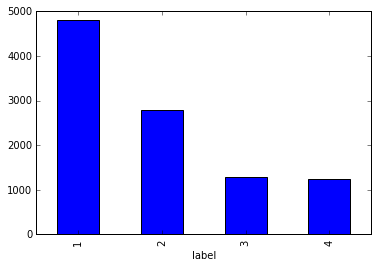

In [51]:
df.groupby('label').count()['sequence'].plot('bar')

As result, we have a pandas DataFrame containing the sequences labeled with a serotype number from 1 to 4.

Next step involves analysing sequences on each serotype (label)